## Import the required libraries for data analysis and visualization

In [1]:
import numpy as np                     # For numerical computations
import pandas as pd                    # For handling and analyzing tabular data
import seaborn as sns                  # For data visualization (based on matplotlib)
import matplotlib.ticker as mtick      # For controlling number formatting in plots
import matplotlib.pyplot as plt        # For creating visualizations
%matplotlib inline                     # Ensures plots are displayed within the notebook

UsageError: unrecognized arguments: # Ensures plots are displayed within the notebook


## Load and analyse the Telco Customer Churn dataset

In [2]:
telco_base_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Display the first few rows of the dataset
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check the number of rows and columns in the dataset
telco_base_data.shape

(7043, 21)

In [5]:
# Display the names of all columns in the dataset
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Check the data types of all columns
# Helps identify which columns are numeric, categorical, or object types
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Get descriptive statistics for numeric variables
# Includes count, mean, std deviation, min, max, and quartiles
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 1.02, 'Count of TARGET Variable per Category')

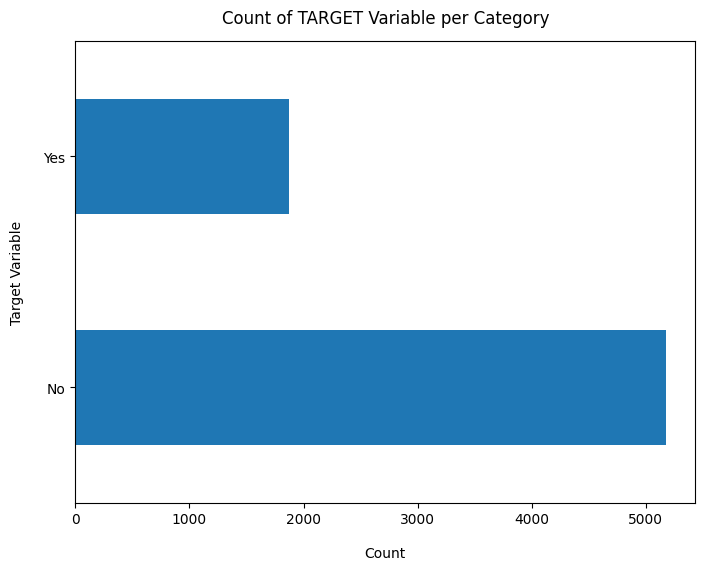

In [8]:
# Visualize the distribution of the target variable 'Churn'
# Displays how many customers have churned (Yes) vs not churned (No)
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per Category", y=1.02)

In [9]:
# Calculate the percentage distribution of churn vs non-churn customers
100 * telco_base_data['Churn'].value_counts() / len(telco_base_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [10]:
# Display the exact counts of churn and non-churn customers
telco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
# Display concise information about the dataframe
# verbose=True shows full details including column data types and non-null counts
telco_base_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


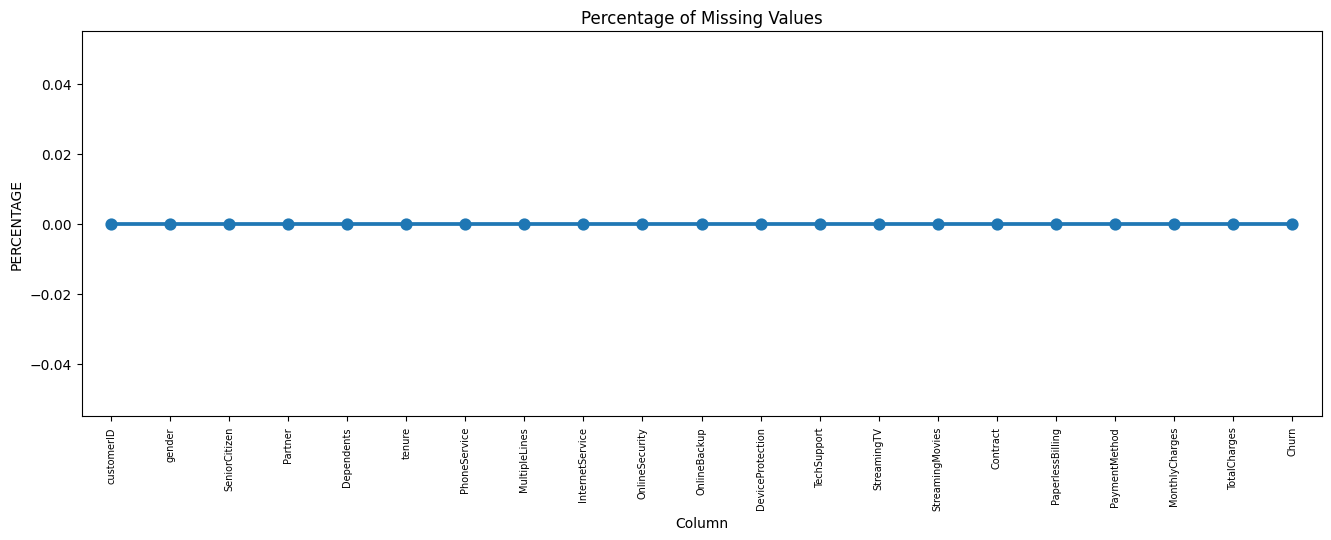

In [12]:
# Check and visualize missing values in the dataset
# Calculate percentage of missing values per column
missing = pd.DataFrame((telco_base_data.isnull().sum()) * 100 / telco_base_data.shape[0]).reset_index()
missing.columns = ['Column', 'MissingPercentage']  # Rename columns for clarity

# Plot missing value percentages using Seaborn
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='Column', y='MissingPercentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

## Data Cleaning

In [13]:
# No missing values in this particular dataset

In [14]:
# Create a copy of the original dataset to preserve the raw data
telco_data = telco_base_data.copy()

In [15]:
# Convert 'TotalCharges' column to numeric type
# Some values may be stored as strings due to data entry errors.
# 'errors="coerce"' converts invalid parsing to NaN (missing values).
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')

# Check how many missing values exist in each column after conversion
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
# Display the rows where 'TotalCharges' is missing
# Helps identify which customers have missing or invalid charges
telco_data.loc[telco_data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
# Remove rows with missing values
# 'how="any"' means drop any row that has even one NaN value
telco_data.dropna(how='any', inplace=True)

# Alternatively, we could fill missing values instead of dropping:
# telco_data.fillna(0)

In [18]:
# Find the maximum value of 'tenure' (customer duration in months)
# Used later to define the range for grouping customers by tenure
print(telco_data['tenure'].max()) 

72


In [19]:
# Create tenure groups (bins) of 12 months each for analysis
# Example groups: '1 - 12', '13 - 24', ..., up to '61 - 72'
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(
    telco_data.tenure,               # column to group
    range(1, 80, 12),                # bin edges (1–12, 13–24, …)
    right=False,                     # left-inclusive intervals
    labels=labels                    # group labels
)

In [20]:
# Display the count of customers in each tenure group
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [21]:
# Drop unnecessary columns
# 'customerID' is a unique identifier — not useful for modeling
# 'tenure' is replaced by the new 'tenure_group' column
telco_data.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)
# Display the cleaned dataset preview
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

UNIVARIATE ANALYSIS

In [22]:
# The goal here is to visually explore how each predictor (feature) relates to the target variable 'Churn' using count plots.

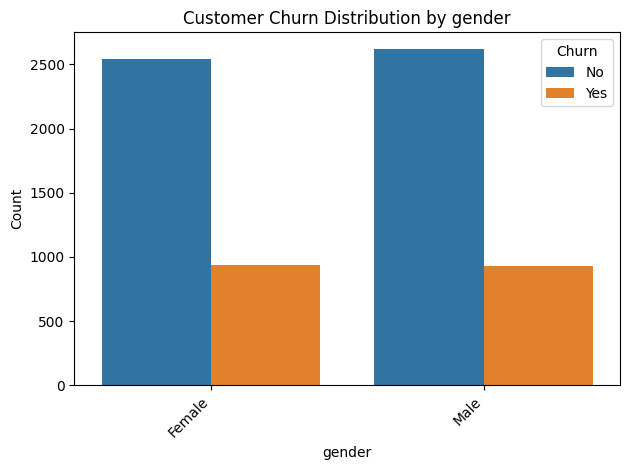

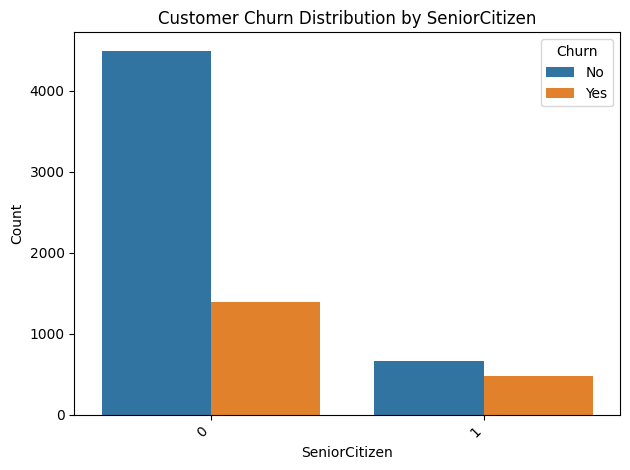

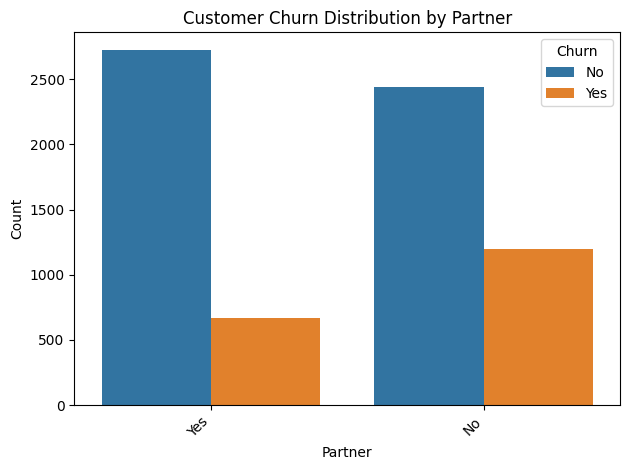

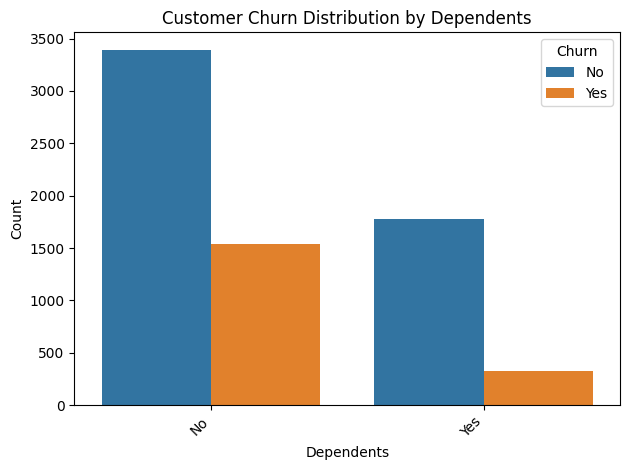

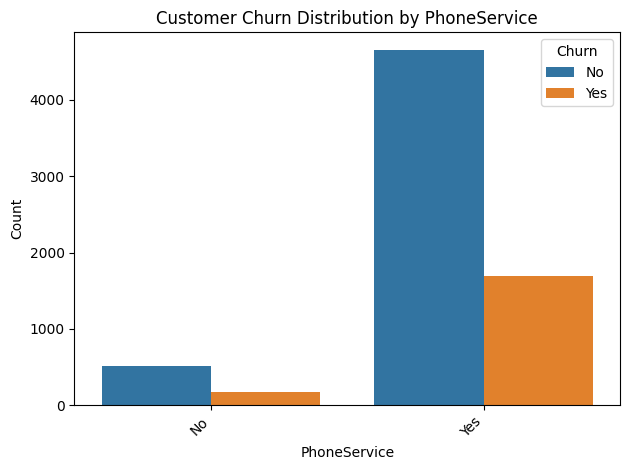

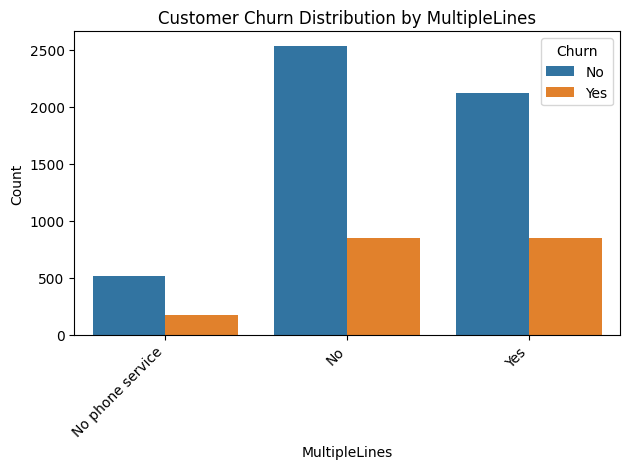

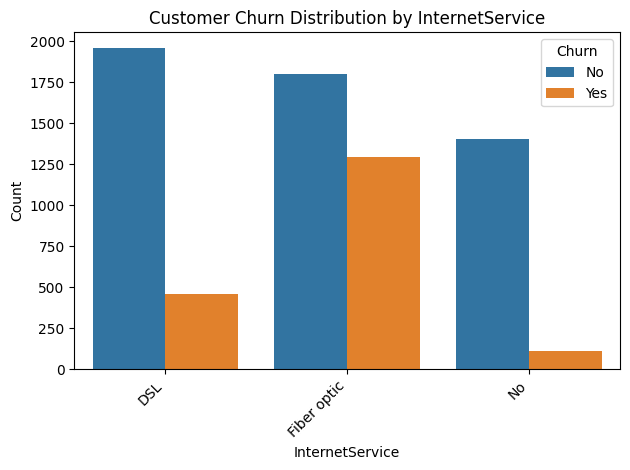

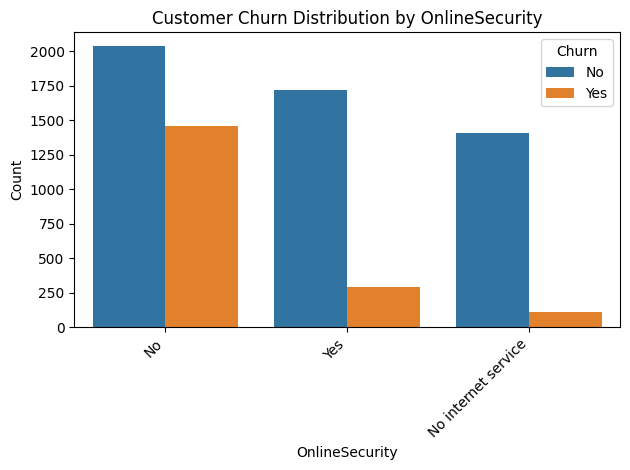

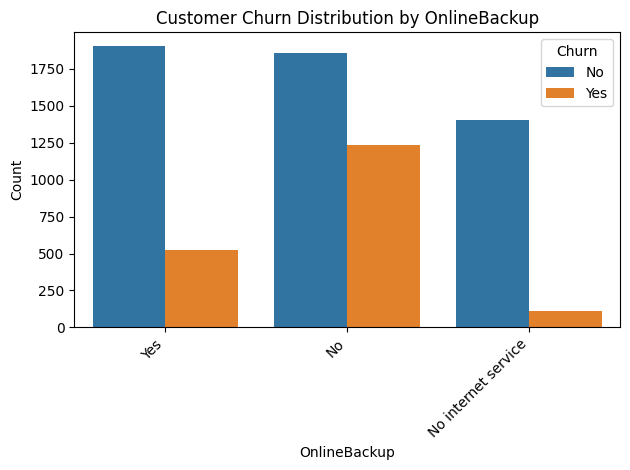

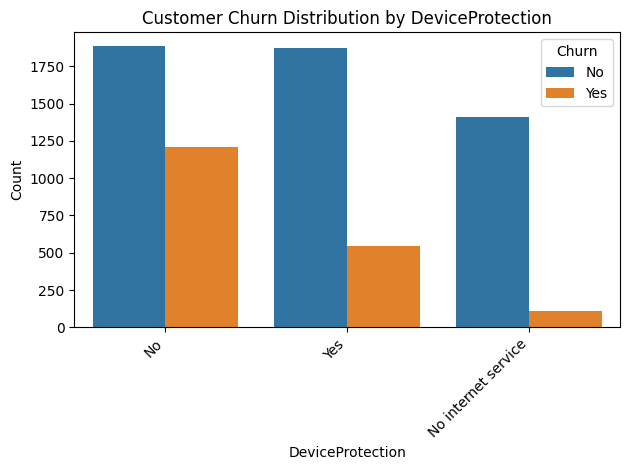

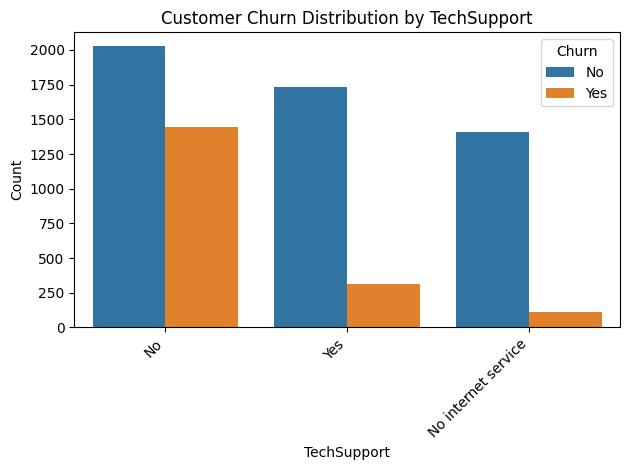

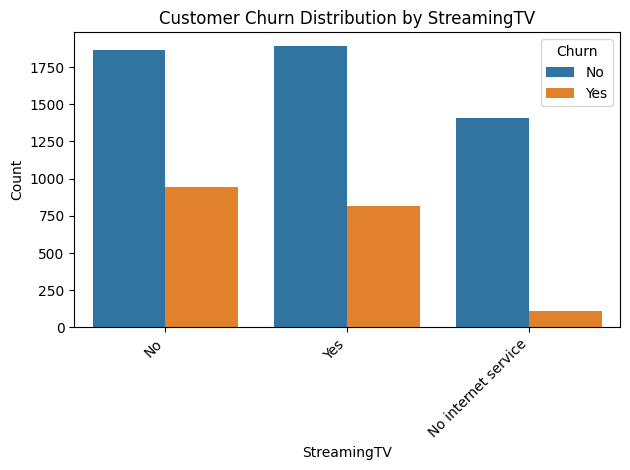

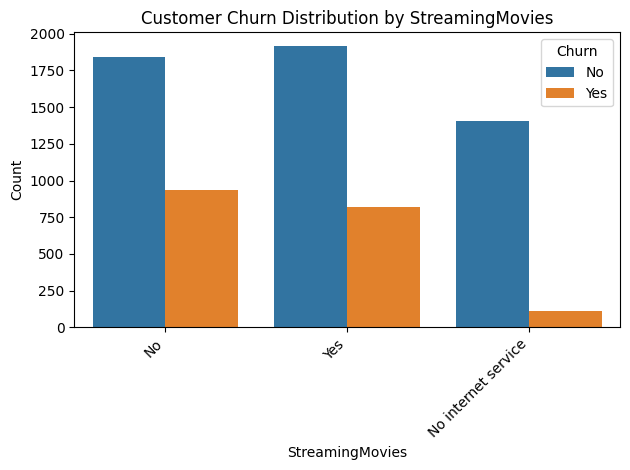

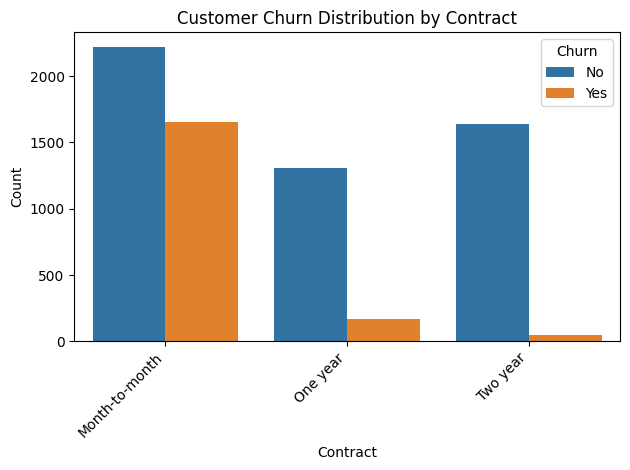

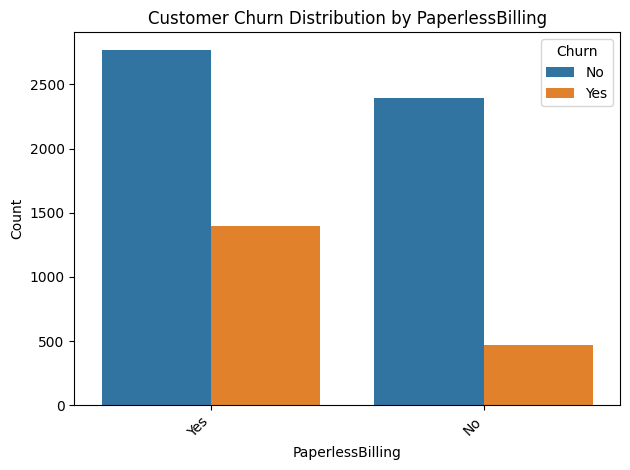

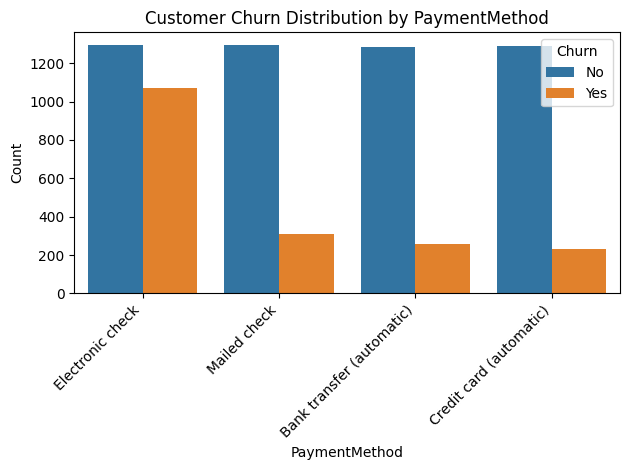

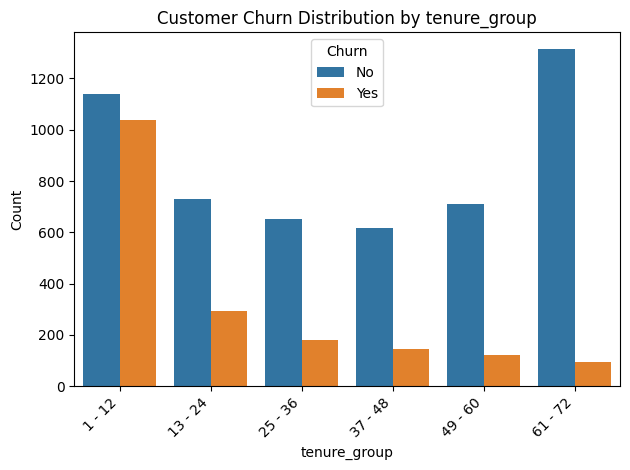

In [23]:
# Loop through each column (predictor) in the dataset
# We exclude:
# - 'Churn' (the target variable itself)
# - 'TotalCharges' and 'MonthlyCharges' (continuous variables that are better explored using histograms or boxplots)
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    
    # Create a new figure for each predictor
    plt.figure(i)
    
    # Create a count plot showing how the churn rate varies by each category
    # 'x=predictor' → current feature on x-axis
    # 'hue="Churn"' → bars split by churn status (Yes/No)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')
     # Add an informative title
    plt.title(f"Customer Churn Distribution by {predictor}", fontsize=12)
    
    # Rotate x-axis labels if they overlap
    plt.xticks(rotation=45, ha='right')
    
    # Add labels for clarity
    plt.xlabel(predictor)
    plt.ylabel("Count")
    
    # Improve layout so labels don’t overlap
    plt.tight_layout()

# ------------------------------------------------------------
# This loop generates a separate count plot for every categorical feature to visually compare how customer churn varies across different categories.
# ------------------------------------------------------------

In [24]:
# DATA PREPROCESSING AND CORRELATION ANALYSIS

In [25]:
# Convert the 'Churn' column to a numeric format
# Replace 'Yes' with 1 and 'No' with 0 for model compatibility
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes', 1, 0)

In [26]:
# Display the first few rows to confirm the conversion
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [27]:
# Convert categorical variables into dummy (binary) variables get_dummies() creates a new column for each category (One-Hot Encoding)
# This step is necessary before feeding the data into ML models
telco_data_dummies = pd.get_dummies(telco_data)
# Display the transformed dataset
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


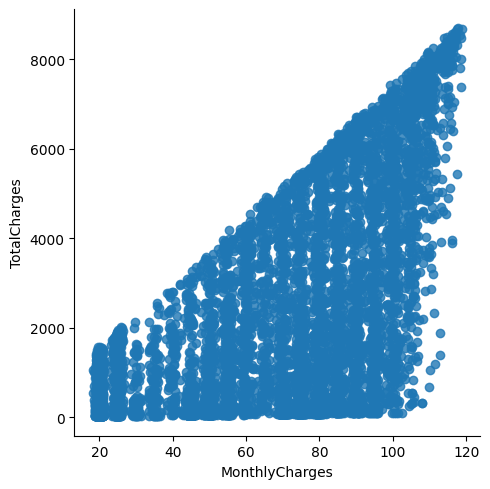

In [28]:
# Scatter plot between 'MonthlyCharges' and 'TotalCharges'
# Helps visualize the relationship between monthly and total payments
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Text(0.5, 1.0, 'Monthly Charges by Churn')

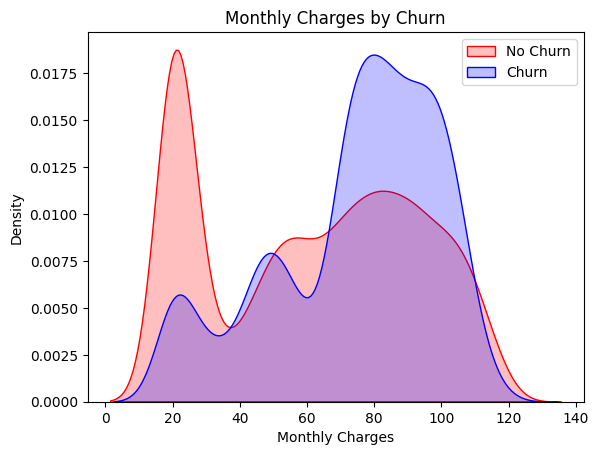

In [29]:
# KDE (Kernel Density Estimate) plots for Monthly Charges by Churn status
# Visualizes the distribution of monthly charges among churned and retained customers

Mth = sns.kdeplot(
    telco_data_dummies.MonthlyCharges[telco_data_dummies["Churn"] == 0],
    color="Red", fill=True
)
Mth = sns.kdeplot(
    telco_data_dummies.MonthlyCharges[telco_data_dummies["Churn"] == 1],
    ax=Mth, color="Blue", fill=True
)

# Add legend, labels, and title
Mth.legend(["No Churn", "Churn"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by Churn')

Text(0.5, 1.0, 'Total Charges by Churn')

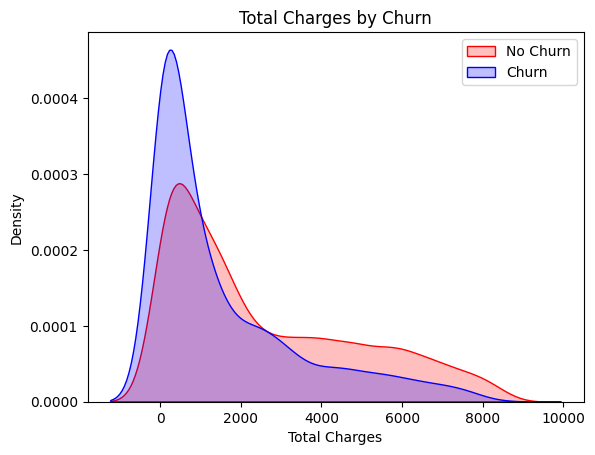

In [30]:
# KDE plots for Total Charges by Churn status
# Helps understand how total payments differ between churned and retained customers

Tot = sns.kdeplot(
    telco_data_dummies.TotalCharges[telco_data_dummies["Churn"] == 0],
    color="Red", fill=True
)
Tot = sns.kdeplot(
    telco_data_dummies.TotalCharges[telco_data_dummies["Churn"] == 1],
    ax=Tot, color="Blue", fill=True
)

# Add legend, labels, and title
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total Charges by Churn')

Text(0, 0.5, 'Correlation Coefficient')

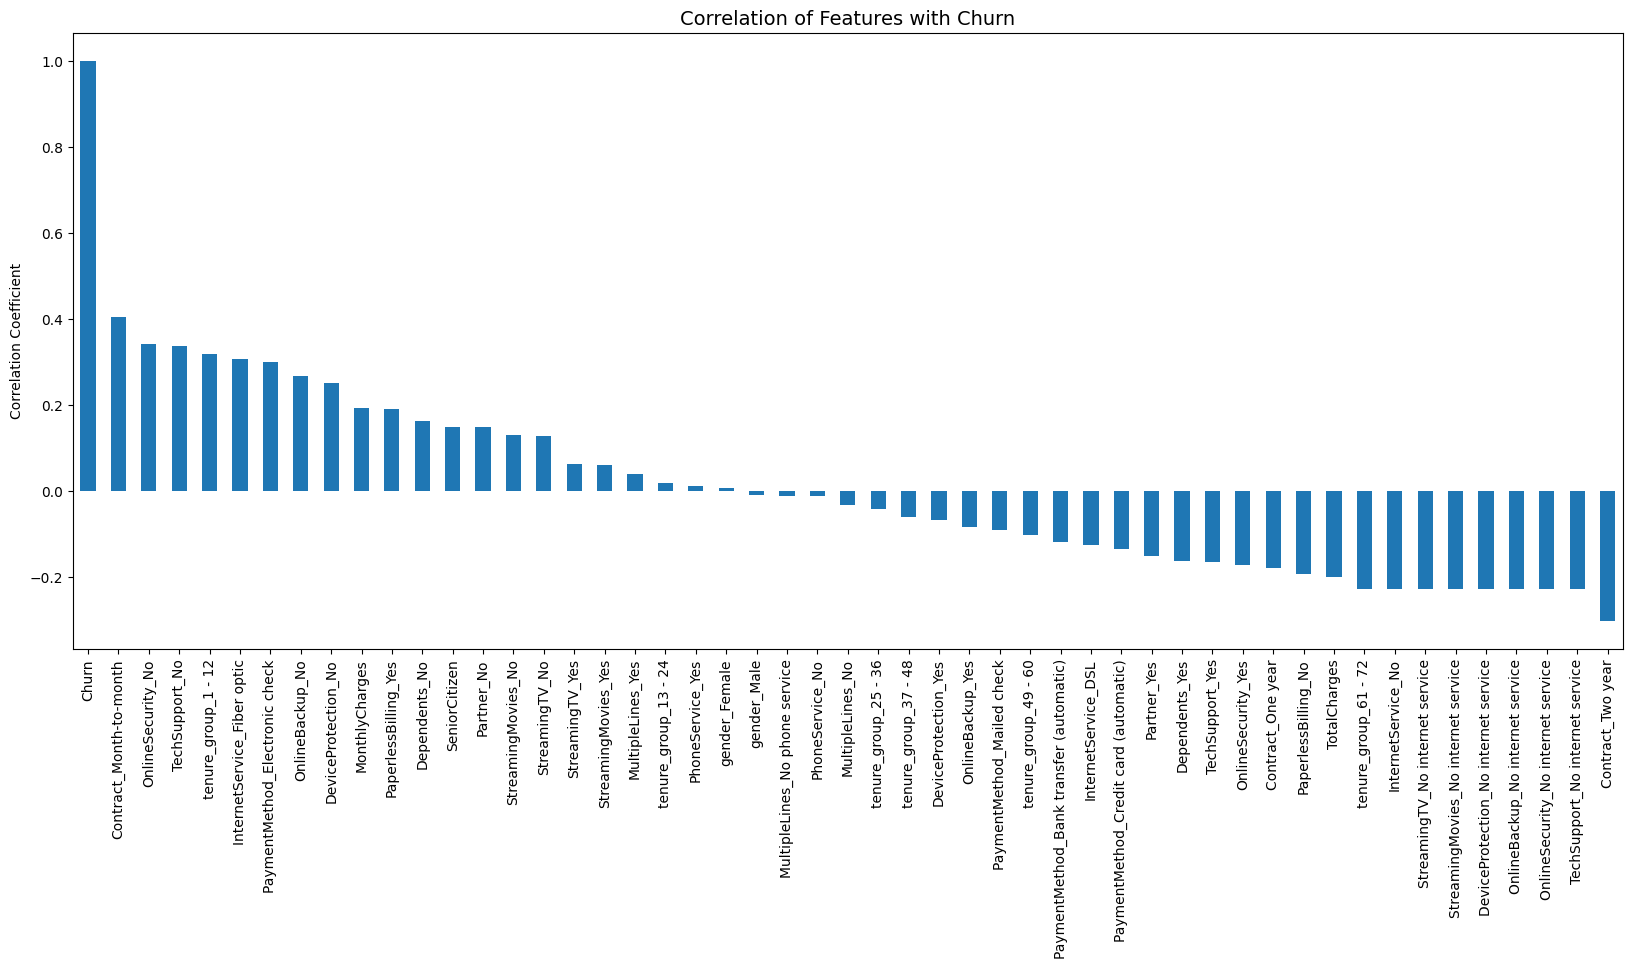

In [31]:
# Bar plot showing correlation of all variables with 'Churn'
# Helps identify which features have the strongest relationship with churn
plt.figure(figsize=(20, 8))
telco_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.title("Correlation of Features with Churn", fontsize=14)
plt.ylabel("Correlation Coefficient")

Text(0.5, 1.0, 'Feature Correlation Heatmap')

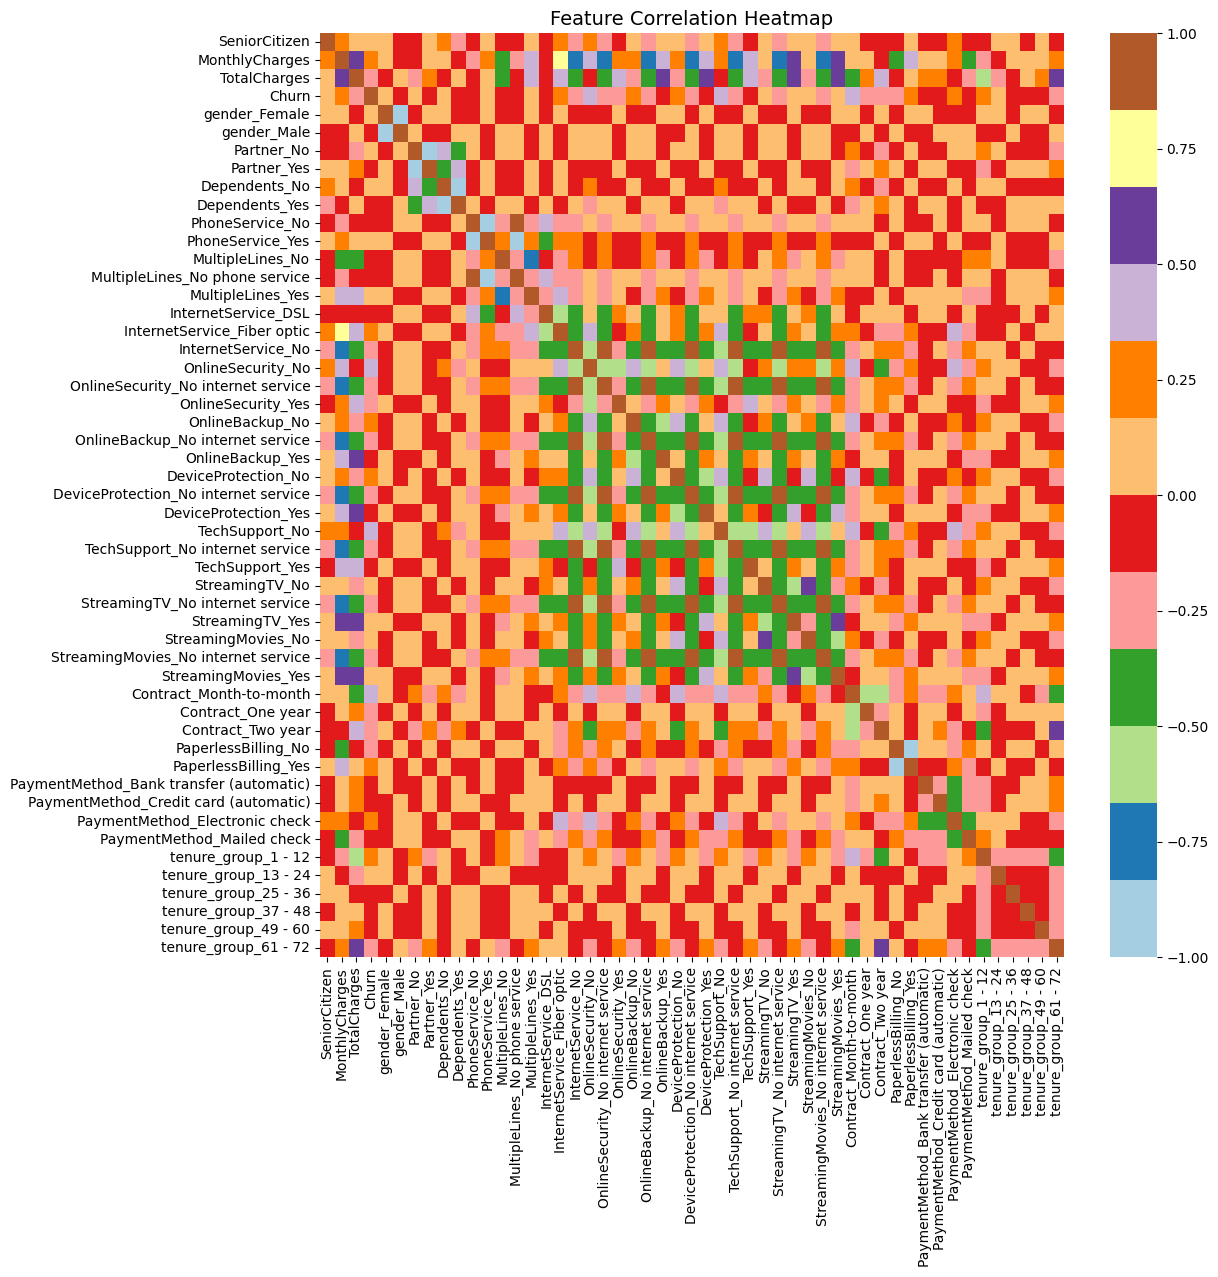

In [32]:
# Correlation Heatmap for all variables
# Displays relationships among all features in the dataset
plt.figure(figsize=(12, 12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")
plt.title("Feature Correlation Heatmap", fontsize=14)

BIVARIATE ANALYSIS

In [33]:
# Objective:
# To explore the relationship between two categorical variables, particularly how different customer features relate to churn behavior

In [34]:
# Separate the dataset into two parts:
# - new_df1_target0 → customers who did NOT churn
# - new_df1_target1 → customers who churned
new_df1_target0 = telco_data.loc[telco_data["Churn"] == 0]
new_df1_target1 = telco_data.loc[telco_data["Churn"] == 1]

In [35]:

# Define a reusable plotting function 'uniplot'
def uniplot(df, col, title, hue=None):
    # Create figure and axis
    fig, ax = plt.subplots()
    
    # Dynamic width: based on unique categories in 'col' and 'hue'
    temp = pd.Series(data=hue) if hue is not None else pd.Series()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=45)
    
    # Set the plot title
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette=['#1f77b4', '#ff7f0e'])
        
    # Show the plot
    plt.show()

In [36]:
# Apply 'uniplot' to visualize feature relationships for churned and non-churned customers by gender

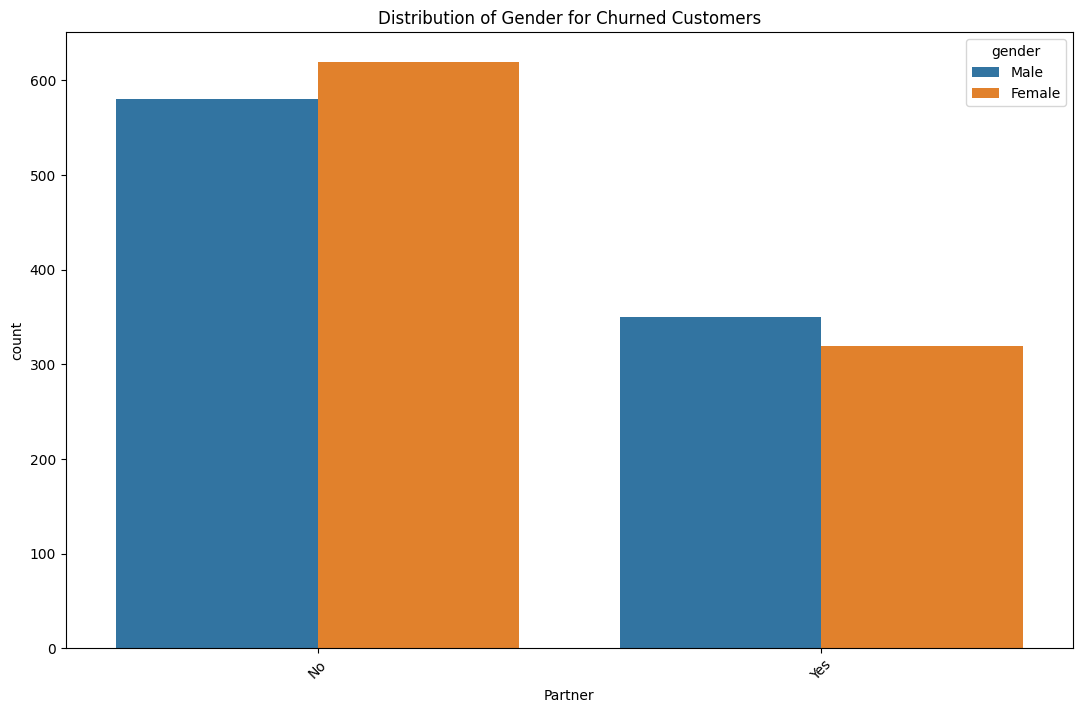

In [37]:
# Distribution of gender across partners for churned customers
uniplot(new_df1_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

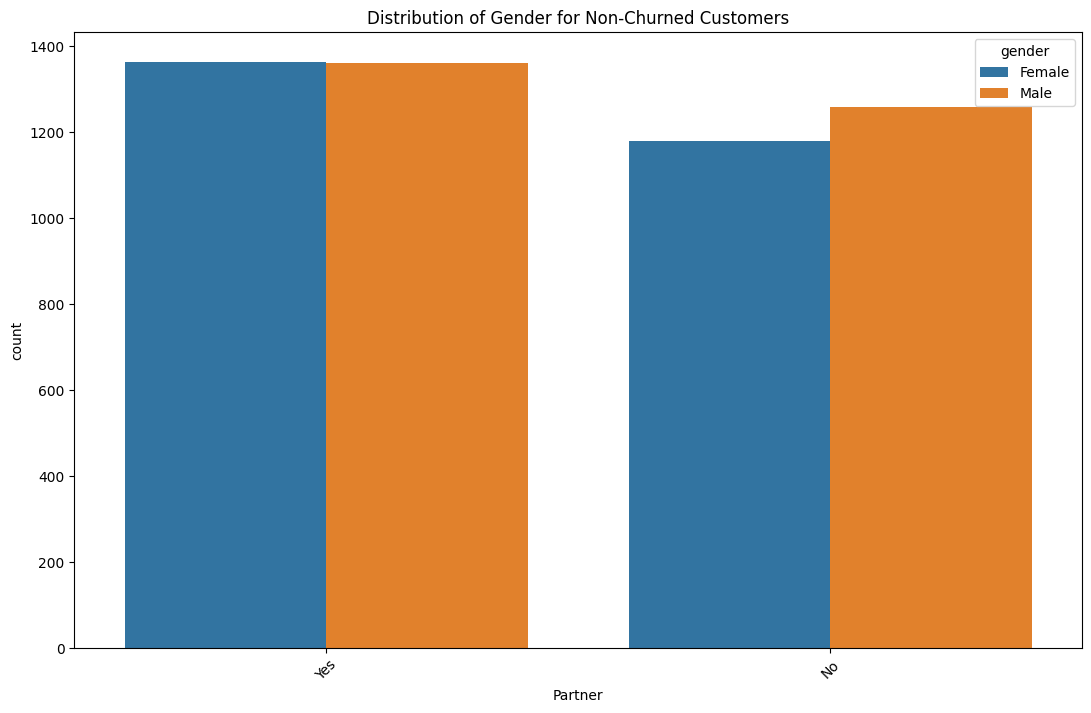

In [38]:
# Distribution of gender across partners for non-churned customers
uniplot(new_df1_target0, col='Partner',
        title='Distribution of Gender for Non-Churned Customers', hue='gender')

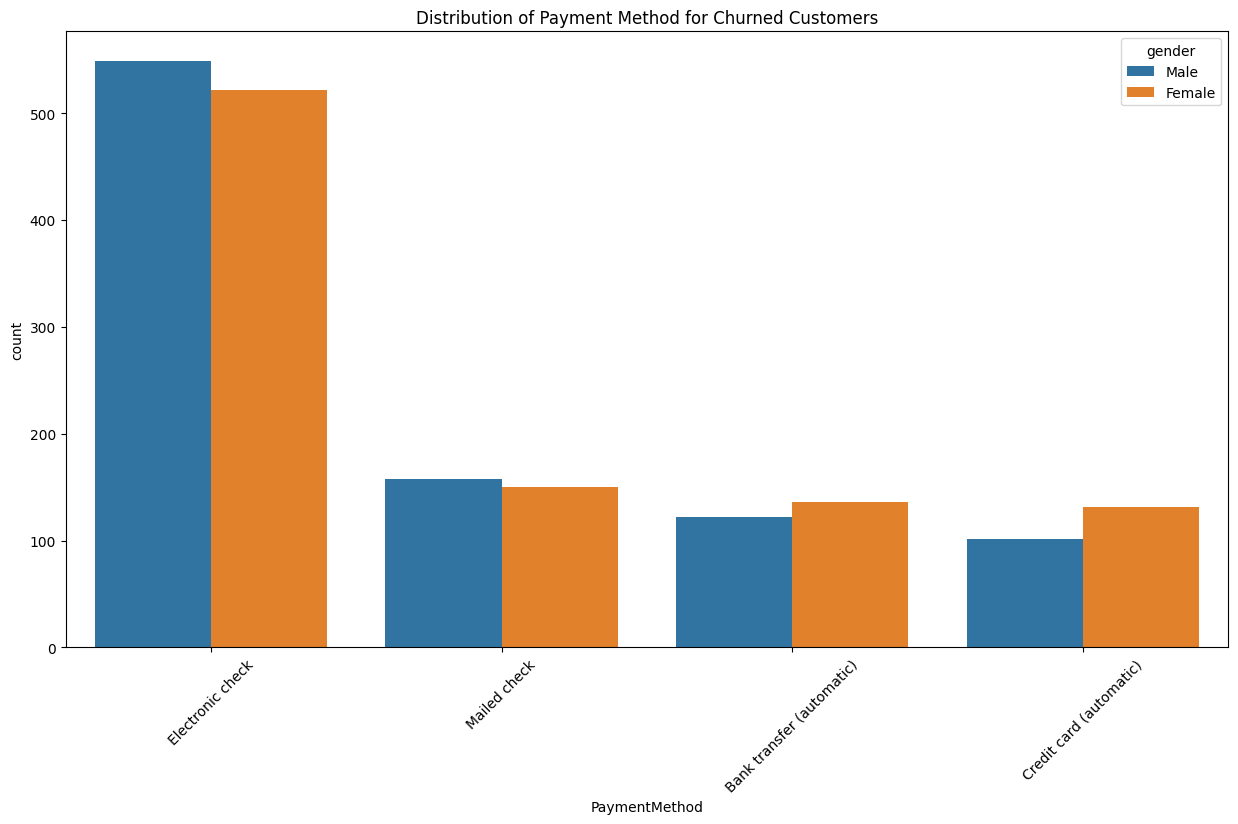

In [39]:
# Distribution of gender across payment methods for churned customers
uniplot(new_df1_target1, col='PaymentMethod',
        title='Distribution of Payment Method for Churned Customers', hue='gender')

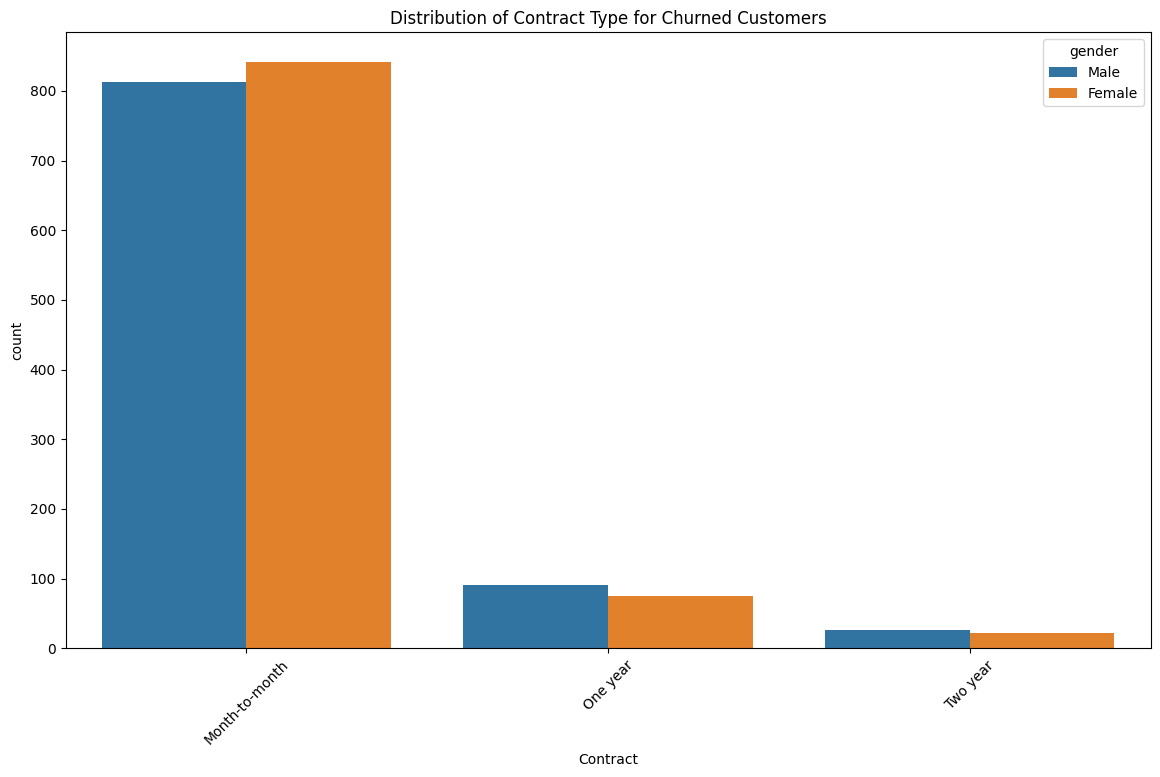

In [40]:
# Distribution of gender across contract types for churned customers
uniplot(new_df1_target1, col='Contract',
        title='Distribution of Contract Type for Churned Customers', hue='gender')

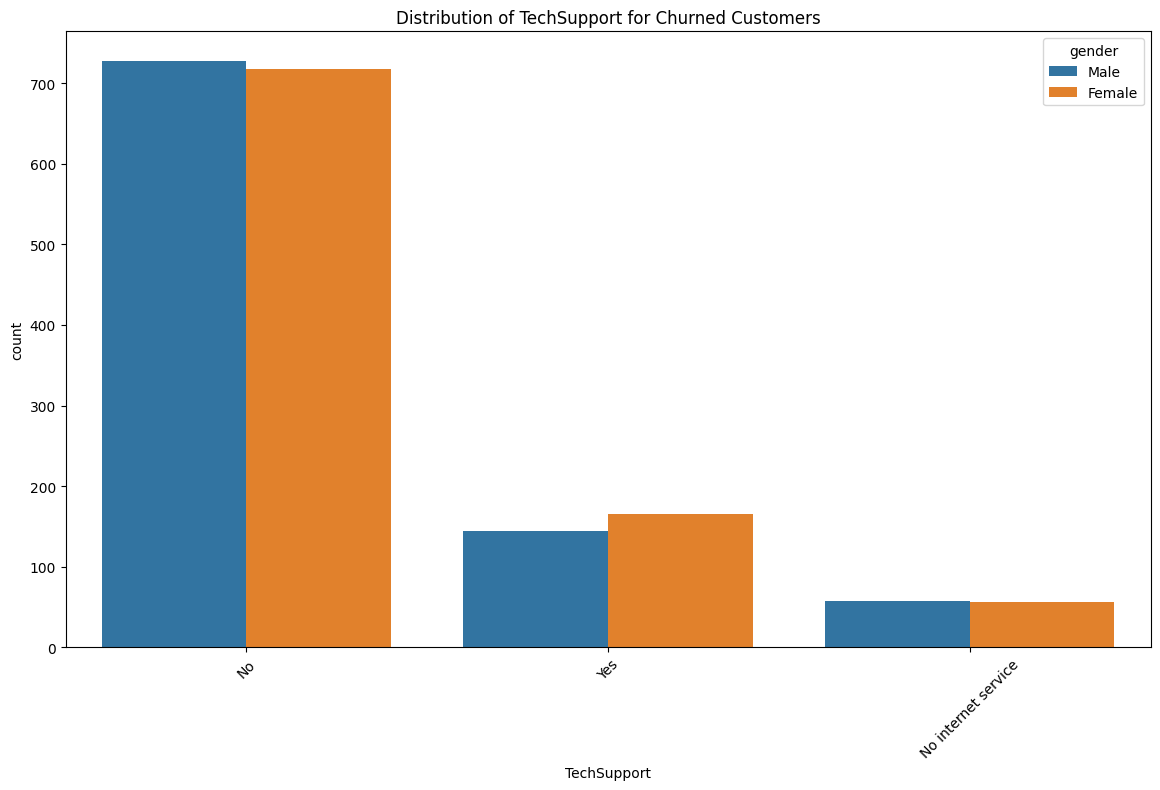

In [41]:
# Distribution of gender across tech support for churned customers
uniplot(new_df1_target1,col='TechSupport',
        title='Distribution of TechSupport for Churned Customers',hue='gender')

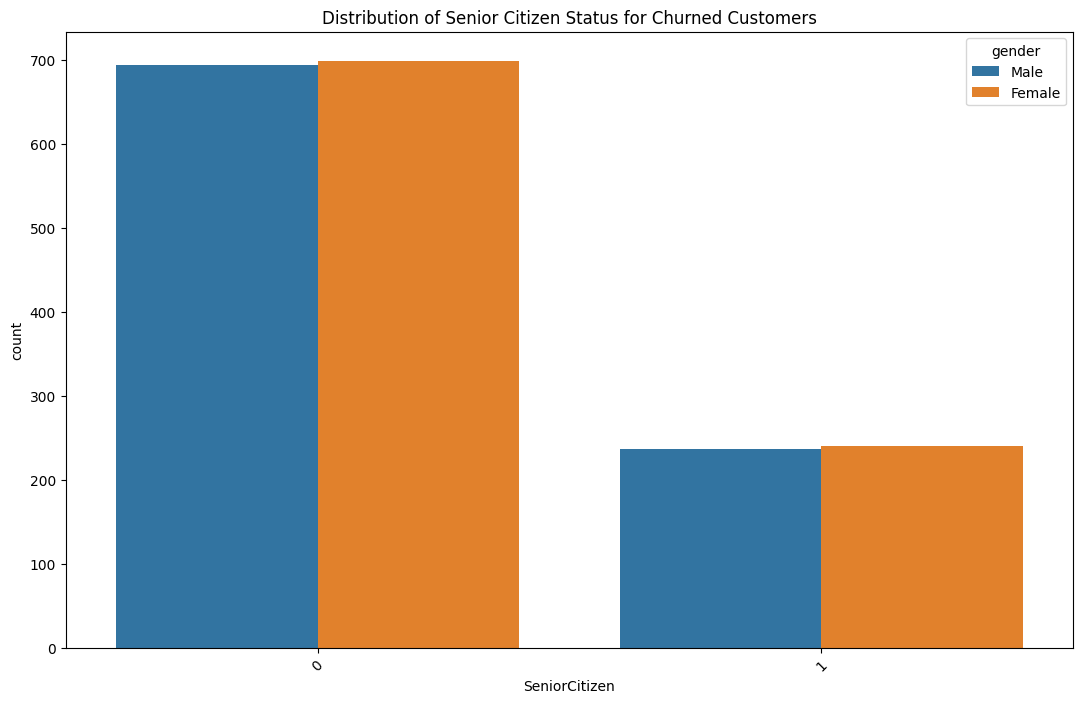

In [42]:
# Distribution of gender across senior citizen status for churned customers
uniplot(new_df1_target1, col='SeniorCitizen',
        title='Distribution of Senior Citizen Status for Churned Customers', hue='gender')

## CONCLUSION

In [43]:
# Save the dummy-transformed dataset to a CSV file
# This file can be used later for model training and evaluation
telco_data_dummies.to_csv('tel_churn.csv', index=False)